# AFC ---> double ACP

# importatation des modules et bibliothèques

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.distributions import chi2

# definition du dataset

In [8]:
data = {
    "Chatains" : [119, 54, 29, 84],
    "Roux" : [26, 14, 14, 17],
    "Blonds" : [7, 10, 16, 94]
}

index = ["Marrons", "Noisette", "Verts", "Bleus"]

## Notre dataset met en evidence deux vaiables statistiques:

* ***la couleleur des yeux***: nous désignons par **X** cette variable avec les modalités _Marrons, Noisette Verts et Bleus_
* ***la couleur des cheveux***: nous désignons par **Y** cette variable avec les modalités _Chatins, Roux et Blonds_

Le but est d'analyse la correspondance entre les modalités des deux varibales statistiques.</br>
Toute fois cette analyse se fera sur un univers omega qui represente les personne faisant partir de notre échantillons

In [9]:
#data frame des donnée
df = pd.DataFrame(data, index = index)
df

,Chatains,Roux,Blonds
Marrons,119,26,7
Noisette,54,14,10
Verts,29,14,16
Bleus,84,17,94


In [10]:
#effectif total de l'echantillon de la population
n = df.sum().sum()
n

484

In [11]:
#calcule de la somme marginale par ligne
L_somme_marginale = df.sum(axis = 1).values.reshape(4, 1)
L_somme_marginale

array([[152],
       [ 78],
       [ 59],
       [195]], dtype=int64)

In [12]:
#calcul de la somme marginale par colonne
C_somme_marginale = df.sum().values.reshape(3, 1)
C_somme_marginale

array([[286],
       [ 71],
       [127]], dtype=int64)

# Mise en oeuvre du test de chi2

* **H(0)**: hypothèse nulle --> les deux variables statistiques vue comme des _variable aléatoires_ sous ***l'équiprobabilité*** sont independantes.
* **H(1)**: hypothèse alternative --> les deux variables sont dependantes

In [13]:
#nouveau tableau des effectifs attendue sous l'hypothèse H(0)
df_attendue = np.dot(L_somme_marginale, C_somme_marginale.T)/n
df_attendue

array([[ 89.81818182,  22.29752066,  39.88429752],
       [ 46.09090909,  11.44214876,  20.46694215],
       [ 34.86363636,   8.65495868,  15.48140496],
       [115.22727273,  28.6053719 ,  51.16735537]])

In [14]:
#calculs des la valeur statistique de test
X_square = (np.power((df_attendue-df), 2)/df_attendue).sum().sum()
X_square

97.82186044949358

In [15]:
#calcul du degré de liberté
d = (len(df.sum().values) - 1)*(len(df.sum(1).values) - 1)
d

6

In [16]:
#calcule de la p_valeur
p_value = chi2.sf(X_square, d)
p_value

7.141485105307127e-19

In [21]:
test = "hypothèse nulle admise donc les variables sont independantes" if (p_value > 0.05) else "hypothèse nulle rejetée donc les variables sont dependantes"
test

'hypothèse nulle rejetée donc les variables sont dependantes'

* Note: comme les variables _sont dependantes_ (**ou correspondantes**) il en vaut la peine de faire l'**AFC** sur nos données, cette fois pour determiner les correspondances entre les modalités de nos deux variables statistiques

### matrice des frequences

In [22]:
#calcul de la matrice des fréquences
F = df/n
F

,Chatains,Roux,Blonds
Marrons,0.245868,0.053719,0.014463
Noisette,0.111570,0.028926,0.020661
Verts,0.059917,0.028926,0.033058
Bleus,0.173554,0.035124,0.194215


In [26]:
#cacul de la matrice de poids pour les profils lignes, qui represente aussi la metrique pour les profils colonnes
DK = np.diag(L_somme_marginale.T[0]/n)
DK_inv = np.linalg.inv(DK)
DK_inv

array([[3.18421053, 0.        , 0.        , 0.        ],
       [0.        , 6.20512821, 0.        , 0.        ],
       [0.        , 0.        , 8.20338983, 0.        ],
       [0.        , 0.        , 0.        , 2.48205128]])

In [27]:
# calcule de le matrice des poids pour les profils colonnes, qui represente aussi la metrique des pour les profils lignes
DL = np.diag(C_somme_marginale.T[0]/n)
DL_inv = np.linalg.inv(DL)
DL_inv

array([[1.69230769, 0.        , 0.        ],
       [0.        , 6.81690141, 0.        ],
       [0.        , 0.        , 3.81102362]])

## Etude sur les profils ligne: premier ACP --> lignes

In [28]:
# calcul de la matrice des profils lignes
L = np.dot(DK_inv, F)
L

array([[0.78289474, 0.17105263, 0.04605263],
       [0.69230769, 0.17948718, 0.12820513],
       [0.49152542, 0.23728814, 0.27118644],
       [0.43076923, 0.08717949, 0.48205128]])

* calcuel des **distances** entre quelques lignes

In [29]:
#ligne 1 et 2
chi2_L1_L2 = np.dot(np.dot(L[0,:].reshape(3,1).T, DL_inv), L[1, :].reshape(3,1))
chi2_L1_L2

array([[1.14902944]])

In [30]:
#ligne 1 et 3
chi2_L1_L3 = np.dot(np.dot(L[0,:].reshape(3,1).T, DL_inv), L[2, :].reshape(3,1))
chi2_L1_L3

array([[0.97550631]])

In [31]:
#ligne 1 et 4
chi2_L1_L4 = np.dot(np.dot(L[0,:].reshape(3,1).T, DL_inv), L[3, :].reshape(3,1))
chi2_L1_L4

array([[0.75698487]])

In [32]:
#ligne moyenne des profils lignes
L_means = C_somme_marginale/n
L_means

array([[0.59090909],
       [0.14669421],
       [0.26239669]])

In [34]:
# matrice des profils lignes centré
Lc = L - np.dot(np.ones((4,1)), L_means.T)
Lc

array([[ 0.19198565,  0.02435842, -0.21634406],
       [ 0.1013986 ,  0.03279296, -0.13419157],
       [-0.09938367,  0.09059392,  0.00878975],
       [-0.16013986, -0.05951473,  0.21965459]])

In [37]:
#matrice de variances covariances de notre suivant les trois colonnes de la matrice Lc sous la metrique des poids
S_square_row = np.dot(np.dot(Lc.T, DK_inv), Lc)
S_square_row

array([[ 0.32584176, -0.01468014, -0.31116162],
       [-0.01468014,  0.08468093, -0.07000079],
       [-0.31116162, -0.07000079,  0.38116241]])

In [38]:
# calcul de la matrice SM dont on utlisera les valeurs propres
SM_row = np.dot(S_square_row, DL_inv).astype(float)
SM_row


array([[ 0.55142452, -0.10007307, -1.18584429],
       [-0.02484332,  0.57726155, -0.26677466],
       [-0.52658121, -0.47718848,  1.45261895]])

In [39]:
#calculs des valeurs et vecteurs propres
egenvalues, egenvectors = np.linalg.eig(SM_row)

In [40]:
#affichage des valeurs propres
egenvalues

array([1.97046735e+00, 4.37715017e-18, 6.10837679e-01])

In [26]:
#afficharges des vecteurs propres associés
egenvectors

array([[-0.62971444,  0.89129016,  0.69375882],
       [-0.13524809,  0.22126434, -0.71973867],
       [ 0.76496253,  0.39578269,  0.02597985]])

* Nos Vecteur propres ne sont pas classés dans **l'ondre decroissante**, d'où un nécessité de les classer dans cet ordre

In [41]:
egenvalues, egenvectors = np.linalg.eig(SM_row)
ind = np.argsort(egenvalues)[::-1]               #recuperation des indice dans l'ordre decroissante des valeurs propres
egenvalues = egenvalues[ind]                     #adaptation de l'odre décroissantes à nos valeurs propres
egenvectors = egenvectors[:, ind]                #adaptation de l'odre décroissantes à nos vecteurs propres propres

In [42]:
#affichage des valeurs prores avec le nouvel ordre 
egenvalues

array([1.97046735e+00, 6.10837679e-01, 4.37715017e-18])

In [44]:
#affichage des vecteurs prores avec le nouvel ordre
U_row = egenvectors
U_row

array([[-0.62971444,  0.69375882,  0.89129016],
       [-0.13524809, -0.71973867,  0.22126434],
       [ 0.76496253,  0.02597985,  0.39578269]])

* Nos vecteurs propres ne sont pas **DL_inv** (qui represente notre ***matrique*** ici) normé d'où une nécessité de les les normer.

In [45]:
#cas du vecteur 1
U1 = U_row[:, 0].reshape(3,1)
U1_norm = U1/np.sqrt(np.dot(U1.T, np.dot(DL_inv, U1)))
U1_norm

array([[-0.36200943],
       [-0.07775125],
       [ 0.43976067]])

In [46]:
#cas du vecteur 2
U2 = U_row[:, 1].reshape(3,1)
U2_norm = U2/np.sqrt(np.dot(U2.T, np.dot(DL_inv, U2)))
U2_norm

array([[ 0.33269312],
       [-0.3451518 ],
       [ 0.01245868]])

In [47]:
#cas du vecteur 3
U3 = U_row[:, 0].reshape(3,1)
U3_norm = U3/np.sqrt(np.dot(U3.T, np.dot(DL_inv, U3)))
U3_norm

array([[-0.36200943],
       [-0.07775125],
       [ 0.43976067]])

In [48]:
#recuperation des vecteur normés dans une matrice, dite matrice des vecteurs propres que nous allons utiliser dans la suite
data1 = {
    "U1": U1_norm.T[0],
    "U2": U2_norm.T[0],
    "U3": U3_norm.T[0]
}

U_norm_row = pd.DataFrame(data1).to_numpy()
U_norm_row

array([[-0.36200943,  0.33269312, -0.36200943],
       [-0.07775125, -0.3451518 , -0.07775125],
       [ 0.43976067,  0.01245868,  0.43976067]])

In [49]:
#matrices des nouvelles lignes ou matrices des composantes principales après projection des individus suivant la matrice U
C_row = np.dot(np.dot(Lc , np.linalg.inv(DL)), U_norm_row)
C_row

array([[-0.49310624,  0.04050742, -0.49310624],
       [-0.30439776, -0.02643955, -0.30439776],
       [ 0.0275998 , -0.2686929 ,  0.0275998 ],
       [ 0.49777839,  0.06029763,  0.49777839]])

## Etude sur les profils colonnes: deuxième ACP --> colonne

In [50]:
# calcule de la colonne moyenne des profils colonnes
C_means = L_somme_marginale/n
C_means

array([[0.31404959],
       [0.16115702],
       [0.12190083],
       [0.40289256]])

In [51]:
#matrices des des profils colonnes
C = np.dot(DL_inv, F.T)
C

array([[0.41608392, 0.18881119, 0.1013986 , 0.29370629],
       [0.36619718, 0.1971831 , 0.1971831 , 0.23943662],
       [0.05511811, 0.07874016, 0.12598425, 0.74015748]])

In [52]:
#calcul de la matrice centrée des profils colonnes
Cc = C - np.dot(np.ones((3, 1)), C_means.T)
Cc

array([[ 0.10203433,  0.02765416, -0.02050223, -0.10918627],
       [ 0.0521476 ,  0.03602607,  0.07528227, -0.16345594],
       [-0.25893148, -0.08241687,  0.00408343,  0.33726492]])

In [53]:
#matrice des variances covariances pour les profils colonnes
S_square_column = np.dot(Cc.T, np.dot(DL_inv, Cc))
S_square_column

array([[ 0.29166833,  0.09891034,  0.01919203, -0.4097707 ],
       [ 0.09891034,  0.03602823,  0.01624622, -0.15118479],
       [ 0.01919203,  0.01624622,  0.03940914, -0.07484739],
       [-0.4097707 , -0.15118479, -0.07484739,  0.63580289]])

In [56]:
#matrice SM donc on va utiliser les vecteurs propres
SM_column = np.dot(S_square_column, DK_inv)
SM_column

array([[ 0.92873338,  0.61375133,  0.1574397 , -1.01707189],
       [ 0.31495134,  0.22355981,  0.13327409, -0.37524841],
       [ 0.06111146,  0.10080989,  0.32328854, -0.18577506],
       [-1.30479618, -0.93812103, -0.61400233,  1.57809537]])

In [58]:
#ici on calcul et on classe les vecteurs propres dans l'ordre decroissante des valeurs propres
egenvalues_column, egenvectors_column = np.linalg.eig(SM_column)
ind = np.argsort(egenvalues_column)[::-1]
egenvalues_column = egenvalues_column[ind]
egenvectors_column = egenvectors_column[:, ind]

In [59]:
#affichage de  la matrice  des vecteurs propres
U_column = egenvectors_column
U_column

array([[-0.53676886, -0.58250506, -0.73172504, -0.15937124],
       [-0.19472211,  0.01239869,  0.47251914,  0.90390375],
       [-0.08504436,  0.78406395, -0.25150173, -0.02405787],
       [ 0.81653533, -0.21395758, -0.4219609 ,  0.39620707]])

* Une fois de plus nos vecteurs propres ne sont pas **DK_inv** (qui represente ici la ***metrique***) normés d'où une nécessité de le faire

In [60]:
#cas du vecteur 1
U_1 = U_column[:, 0].reshape(4,1)
U_1_norm = U_1/np.sqrt(np.dot(U_1.T, np.dot(DK_inv, U_1)))
U_1_norm

array([[-0.31701564],
       [-0.11500286],
       [-0.05022719],
       [ 0.4822457 ]])

In [67]:
#cas du vecteur 3
U_2 = U_column[:, 1].reshape(4,1)
U_2_norm = U_2/np.sqrt(np.dot(U_2.T, np.dot(DK_inv, U_2)))
U_2_norm

array([[-0.23322409],
       [ 0.0049642 ],
       [ 0.31392449],
       [-0.0856646 ]])

In [68]:
#cas du vecteur 3
U_3 = U_column[:, 2].reshape(4,1)
U_3_norm = U_3/np.sqrt(np.dot(U_3.T, np.dot(DK_inv, U_3)))
U_3_norm

array([[-0.36354492],
       [ 0.23476296],
       [-0.12495428],
       [-0.20964397]])

In [69]:
#cas du vecteur 4
U_4 = U_column[:, 3].reshape(4,1)
U_4_norm = U_4/np.sqrt(np.dot(U_4.T, np.dot(DK_inv, U_4)))
U_4_norm

array([[-0.06767916],
       [ 0.38385501],
       [-0.0102165 ],
       [ 0.16825472]])

In [70]:
#recuperation de nos vecteurs propres dans une matrice noté U_norm_column
data2 = {
    "U1": U_1_norm.T[0],
    "U2": U_2_norm.T[0],
    "U3": U_3_norm.T[0],
    "U3": U_4_norm.T[0]
}

U_norm_column = pd.DataFrame(data2).to_numpy()
U_norm_column

array([[-0.31701564, -0.23322409, -0.06767916],
       [-0.11500286,  0.0049642 ,  0.38385501],
       [-0.05022719,  0.31392449, -0.0102165 ],
       [ 0.4822457 , -0.0856646 ,  0.16825472]])

In [71]:
C_column = np.dot(Cc, np.dot(DK_inv, U_norm_column))
C_column

array([[-2.44976055e-01, -1.04505019e-01,  2.42861287e-17],
       [-3.05017370e-01,  1.91008055e-01,  9.71445147e-17],
       [ 7.22199882e-01,  1.28557979e-01, -1.31838984e-16]])

# Representation des deux profils

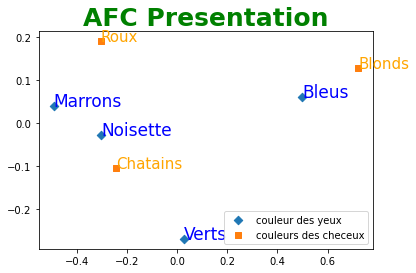

In [81]:
legend = ["couleur des yeux", "couleurs des checeux"]
index1 = ["Marrons", "Noisette", "Verts", "Bleus"]
index2 = ["Chatains", "Roux", "Blonds"]

#nuage des points annotés du profils ligne
plt.scatter(C_row[:,0], C_row[:,1], marker = "D")
for i, x, y in zip(index, C_row[:,0], C_row[:,1]):
    plt.text(x, y, i, fontsize = 17, c = 'blue')

#nuage des points annotés du profils colonnes
plt.scatter(C_column[:,0], C_column[:,1], marker = "s")
for i, x, y in zip(index2, C_column[:,0], C_column[:,1]):
    plt.text(x, y, i, fontsize = 15, c = "orange")

plt.title("AFC Presentation", fontsize = 25, fontweight = 'bold', color = 'green')
plt.legend(legend)
plt.show()

### Au vue des distance entre les points, nous pouvons dire que:

* --> Les individus aux yeux bleus correspondent plus aux individus aux cheveux blonds

* --> Les individus aux yeux noisettes correspondent plus aux individus aux cheveux Chatains

* --> Les individus aux yeux Marrons et Verts n'ont pas une correspondance fiable

* --> Les individus aux cheveux Roux n'ont pas une correspondance fiable